# Titanic Survival Analysis


## Step 1: Load the Dataset


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

# Display the first few rows
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Data Cleaning and Preprocessing


In [2]:

# Drop unnecessary columns
titanic_df = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Fill missing values
titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)
titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace=True)

# Convert categorical variables using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=["Sex", "Embarked"], drop_first=True)

# Check the updated dataset
titanic_df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## Step 3: Data Analysis


In [3]:

# Basic statistics
titanic_df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:

# Correlation matrix
titanic_df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
Sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Embarked_Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


## Step 4: Data Visualization


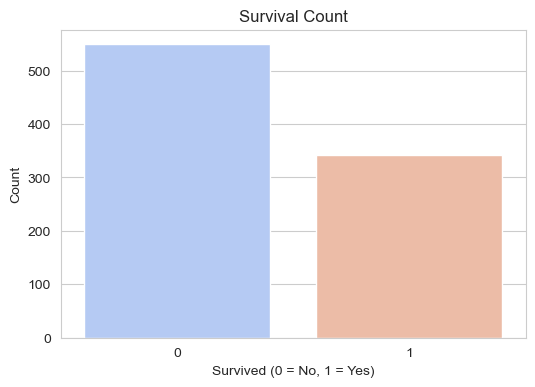

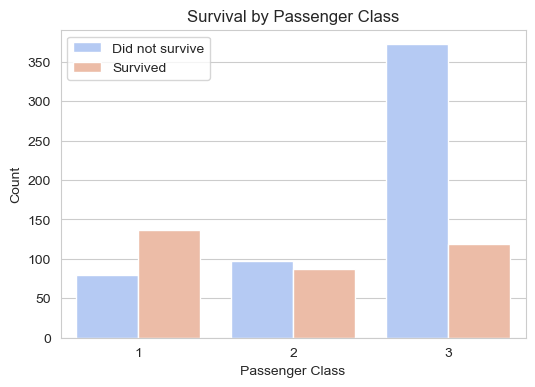

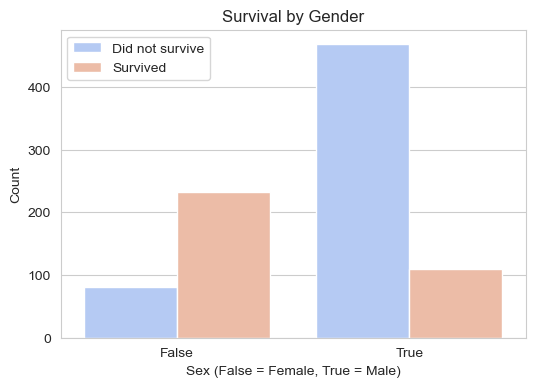

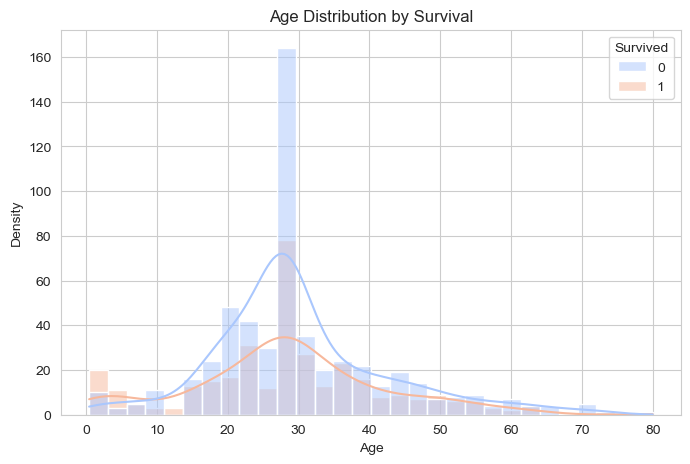

In [8]:

sns.set_style("whitegrid")

# Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x=titanic_df["Survived"], palette="coolwarm")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=titanic_df, palette="coolwarm")
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(["Did not survive", "Survived"])
plt.show()

# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x="Sex_male", hue="Survived", data=titanic_df, palette="coolwarm")
plt.title("Survival by Gender")
plt.xlabel("Sex (False = Female, True = Male)")
plt.ylabel("Count")
plt.legend(["Did not survive", "Survived"])
plt.show()

# Age Distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(titanic_df, x="Age", hue="Survived", kde=True, bins=30, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


## Step 5: Logistic Regression Analysis


In [6]:

# Selecting key features
selected_features = ["Pclass", "Age", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"]

# Define features (X) and target (y)
X_selected = titanic_df[selected_features]
y = titanic_df["Survived"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg_selected = LogisticRegression(max_iter=500)
log_reg_selected.fit(X_train, y_train)

# Predict on test set
y_pred_selected = log_reg_selected.predict(X_test)

# Evaluate model performance
accuracy_selected = accuracy_score(y_test, y_pred_selected)
classification_rep_selected = classification_report(y_test, y_pred_selected)

print("Model Accuracy:", accuracy_selected)
print("Classification Report:\n", classification_rep_selected)


Model Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Step 6: Identify Important Features


In [7]:

# Extract feature importance
feature_importance = pd.DataFrame({
    "Feature": X_selected.columns,
    "Coefficient": log_reg_selected.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("Feature Importance:\n", feature_importance)


Feature Importance:
       Feature  Coefficient
2        Fare     0.000362
1         Age    -0.024610
4  Embarked_Q    -0.100021
5  Embarked_S    -0.513979
0      Pclass    -1.005942
3    Sex_male    -2.459285


## Conclusion
Based on our analysis:
- **Passenger class (Pclass) was the strongest predictor of survival** (lower-class passengers had a lower chance of survival).
- **Males had a lower survival rate compared to females** (aligning with the 'women and children first' policy).
- **Higher fares were associated with better survival chances**, indicating that wealthier passengers had an advantage.
- **Passengers from Southampton had a lower survival rate** compared to those from Cherbourg.
